[Parameter containing:
tensor([[ 6.5704e-01],
        [ 6.1897e-04],
        [-7.4245e-01],
        [-1.0851e+00],
        [ 6.2226e-01],
        [ 1.0475e+00],
        [ 1.5032e+00],
        [ 8.5814e-01],
        [ 8.0917e-01],
        [-3.5789e-01],
        [-6.0083e-01],
        [-1.5450e+00],
        [-1.0530e+00],
        [-8.4005e-02],
        [-3.5089e-01],
        [-2.0328e+00],
        [-2.5716e+00],
        [-1.0897e+00],
        [-2.3523e-01],
        [-1.2216e-02],
        [ 6.2874e-01],
        [ 1.1651e+00],
        [-2.3074e+00],
        [-4.0295e-01],
        [ 1.8249e-01],
        [ 5.4616e-01],
        [-4.5392e-01],
        [ 1.1038e+00],
        [ 1.6346e+00],
        [ 4.7541e-01],
        [-8.6715e-01],
        [-8.5721e-01],
        [ 1.5645e+00],
        [-7.6467e-01],
        [ 3.5420e-01],
        [-7.4909e-01],
        [-5.9637e-01],
        [ 4.6101e-01],
        [ 8.9048e-01],
        [ 1.3735e+00],
        [ 3.0928e-01],
        [ 1.1471e-01],
        [-2

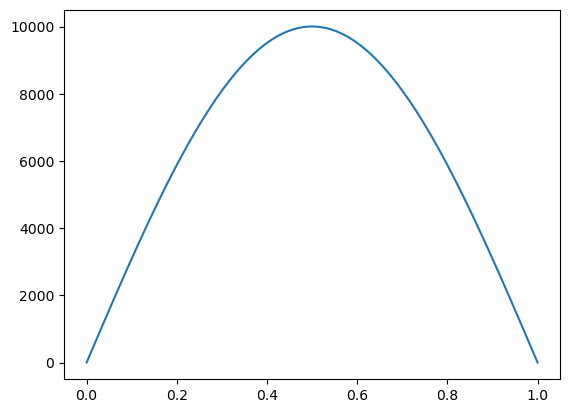

In [1]:
import torch
import torch.nn as nn
W1 = torch.randn(100, requires_grad=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"

loss_fun = nn.MSELoss()
class Line(nn.Module):
    def __init__(self):
        super().__init__()
        self.X = torch.arange(0,1.001,0.01 , device = device).reshape(101,1)
        self.I = nn.Parameter(torch.randn(101,1))
        self.B = nn.Parameter(torch.randn(101, requires_grad=True))
        self.W = nn.Parameter(torch.randn(101,101, requires_grad=True))
        self.a = nn.Parameter(torch.randn(1, requires_grad=True))
        # self.a = torch.tensor(1)
        self.ll = nn.Linear(1,101)
        self.l2 = nn.Linear(101,101)
        self.l3 = nn.Linear(101,1)
        self.bn = nn.BatchNorm1d(101)

    def forward(self):
        #self.Y = torch.tanh(self.I)
        # self.Y = torch.tanh(self.I @ self.W +self.B)
        def adaptive_tan(x):
        #    return torch.relu(x)
            return (torch.e**(self.a* x)-torch.e**(-self.a*x))/(torch.e**(self.a* x)+torch.e**(-self.a*x))
        #    return torch.nn.functional.leaky_relu(x)
        

    #    Y = torch.tanh(self.ll(self.X))
    #    Y = torch.tanh(self.l2(Y))

        Y = adaptive_tan(self.ll(self.X))
        Y = adaptive_tan(self.l2(Y))

        Y = self.bn(Y)
        self.Y = self.l3(Y)
        center = self.Y[1:-1]
        left = self.Y[:-2]
        right = self.Y[2:]

        eq = - (right+left- 2*center)/(0.01*0.01) - 10000* (torch.pi)**2 * torch.sin(torch.pi * self.X[1:-1])
        eq_loss = loss_fun(eq, torch.zeros_like(eq))
        return abs(self.Y[0]) + abs(self.Y[100]) + eq_loss

model = Line().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

import copy
best_model = -1
best_loss = torch.inf
print(list(model.parameters()))

for iter in range(10000):
    loss = model()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if iter%100 == 0:
        print(iter//100, loss)
        if loss < best_loss:
            best_loss = loss
            best_model  = model.Y.detach()
    
import matplotlib.pyplot as plt
x = model.X.detach().numpy()
y = best_model.numpy()
plt.plot(x,y)

